#Goal: Look through dataframe and find information to figure out how the data can be used for clustering and classification.

In [4]:
# Load the data into a pandas dataframe
import pandas as pd
df = pd.read_csv('cancer_data.csv')

df.head()

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type
0,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Chemotherapy
1,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Immunotherapy (Including Vaccines)
2,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Surgery, NOS"
3,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Targeted Molecular Therapy
4,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"


In [5]:
# Display the dataframe attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14552 non-null  object
 1   race                         14552 non-null  object
 2   sex                          14552 non-null  object
 3   age_at_diagnosis             14552 non-null  int64 
 4   morphology                   14552 non-null  object
 5   primary_diagnosis            14552 non-null  object
 6   primary_diagnosis_condition  14552 non-null  object
 7   primary_diagnosis_site       14552 non-null  object
 8   vital_status                 14552 non-null  object
 9   treatment_type               14552 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


Visualize the data based on classes. We'll have our class be vital_status (dead or alive)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

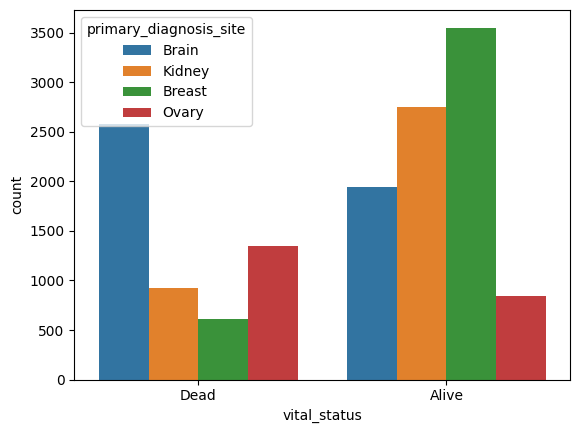

In [6]:
# Visualize the number of instances which are dead or alive (vital_status) based on cancer type (primary_diagnosis_site)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='vital_status', hue='primary_diagnosis_site', data=df)
plt.show()

We can see some trends here, where people with brain cancer tend to have a lower survival rate, and people with breast cancer have a high survival rate.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

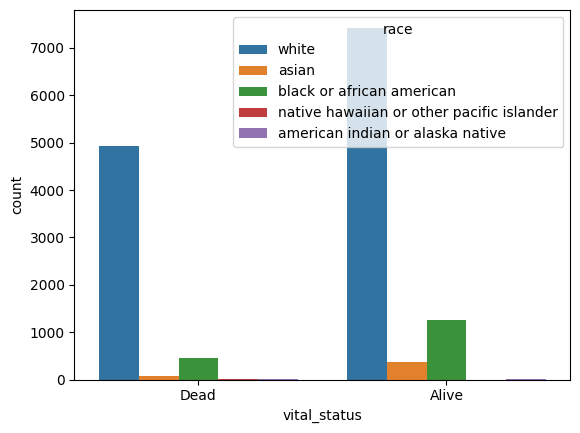

In [12]:
# Visualize the number of instances which are dead or alive (vital_status) based on race
sns.countplot(x='vital_status', hue='race', data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


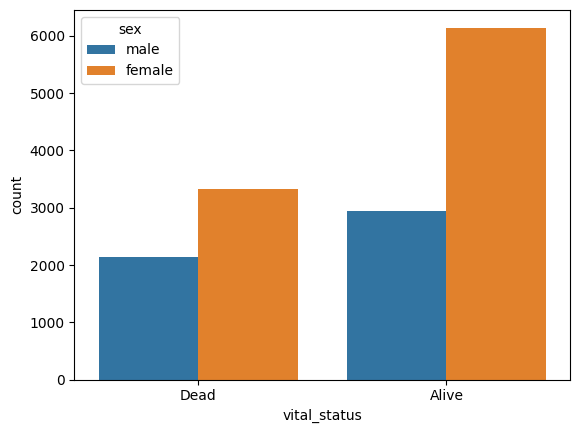

In [14]:
# Visualize the number of instances which are dead or alive (vital_status) based on sex
sns.countplot(x='vital_status', hue='sex', data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


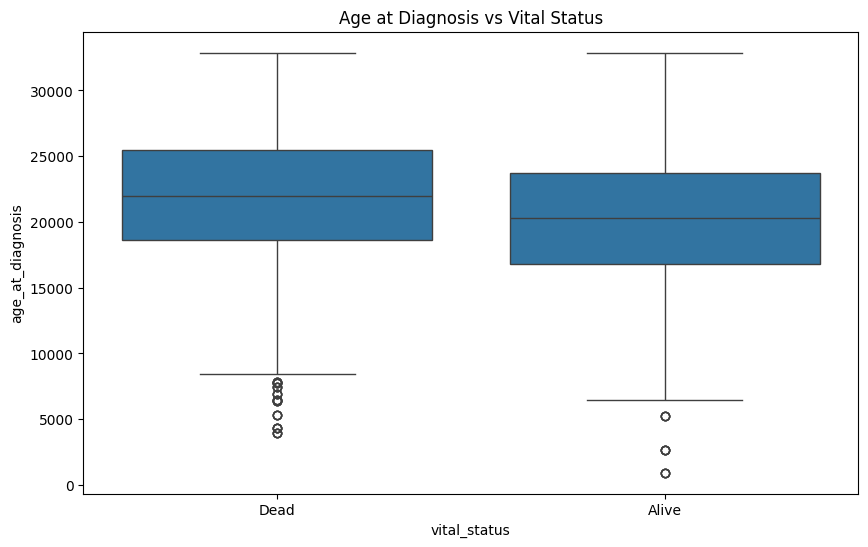

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vital_status', y='age_at_diagnosis', data=df)
plt.title('Age at Diagnosis vs Vital Status')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


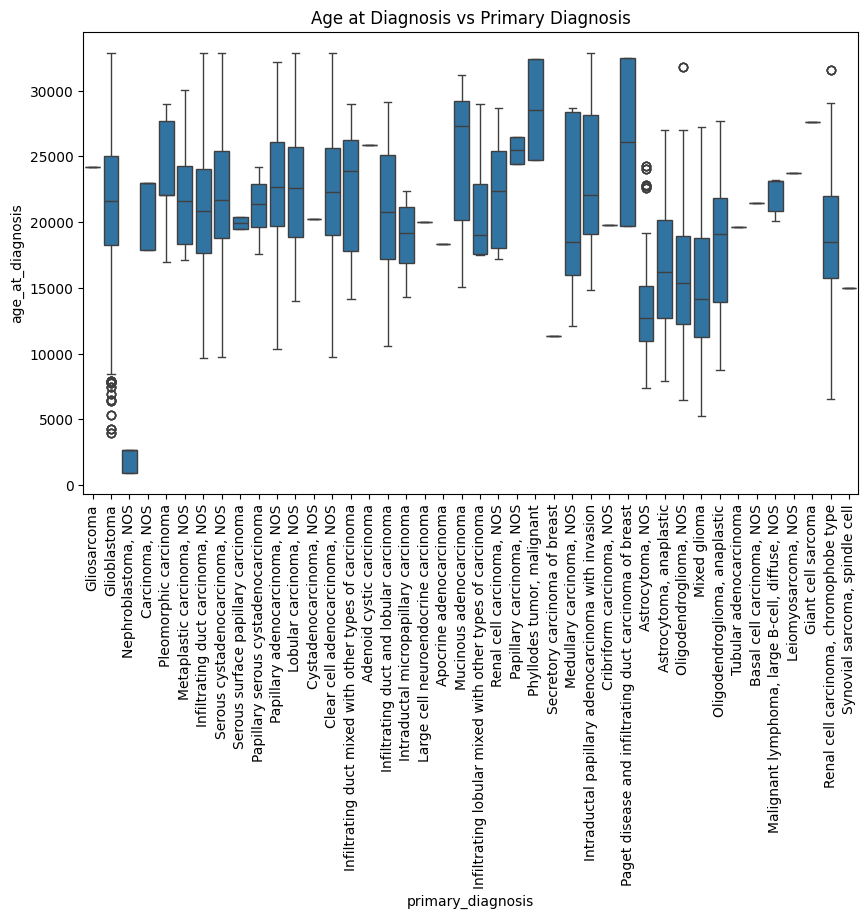

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_diagnosis', y='age_at_diagnosis', data=df)
plt.title('Age at Diagnosis vs Primary Diagnosis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

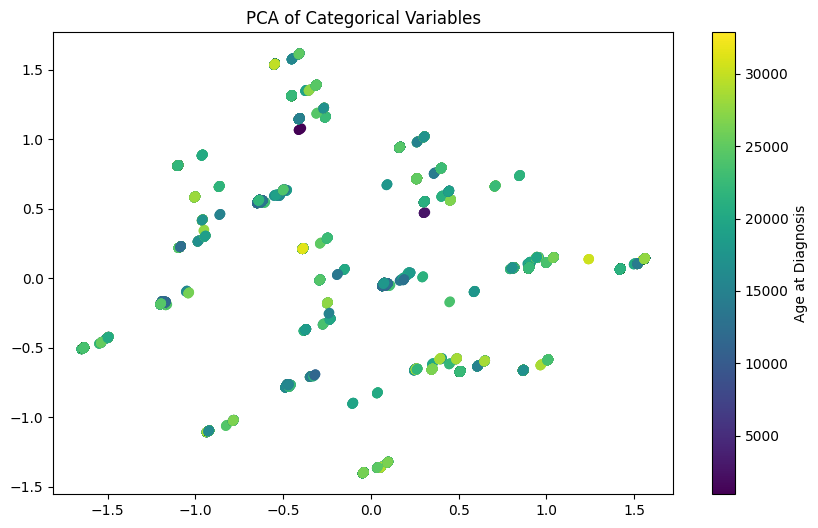

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

# One-Hot Encode the categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['race', 'sex', 'morphology', 'primary_diagnosis', 'primary_diagnosis_site', 'vital_status', 'treatment_type']])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_data)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['age_at_diagnosis'], cmap='viridis')
plt.colorbar(label='Age at Diagnosis')
plt.title('PCA of Categorical Variables')
plt.show()

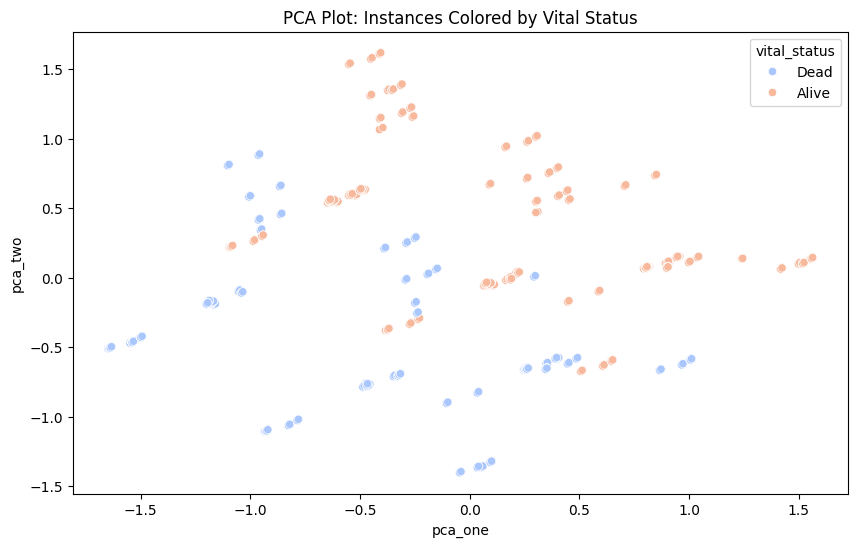

In [21]:
# Add the PCA results back to the original DataFrame for plotting
df['pca_one'] = pca_result[:, 0]
df['pca_two'] = pca_result[:, 1]

# Plot PCA result, coloring by vital_status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='vital_status', data=df, palette='coolwarm')
plt.title('PCA Plot: Instances Colored by Vital Status')
plt.show()